Found 114 images belonging to 15 classes.
Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 27.7225 - accuracy: 0.1010
Epoch 2/10
7/7 [==============================] - 17s 2s/step - loss: 2.8326 - accuracy: 0.1414
Epoch 3/10
7/7 [==============================] - 16s 2s/step - loss: 2.4024 - accuracy: 0.2828
Epoch 4/10
7/7 [==============================] - 15s 2s/step - loss: 1.8325 - accuracy: 0.5758
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 1.1408 - accuracy: 0.7778
Epoch 6/10
7/7 [==============================] - 15s 2s/step - loss: 0.5895 - accuracy: 0.8384
Epoch 7/10
7/7 [==============================] - 15s 2s/step - loss: 0.2064 - accuracy: 0.9697
Epoch 8/10
7/7 [==============================] - 15s 2s/step - loss: 0.1882 - accuracy: 0.9596
Epoch 9/10
7/7 [==============================] - 15s 2s/step - loss: 0.1618 - accuracy: 0.9714
Epoch 10/10
7/7 [==============================] - 15s 2s/step - loss: 0.1266 - accuracy: 0.9

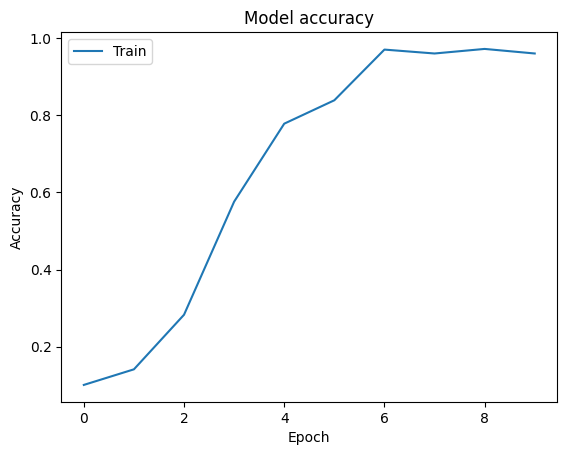

In [9]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
# import the required libraries
import PIL # python image library
import PIL.Image
import tensorflow as tf
import pathlib # to manage the dataset path


# Set the path to the directory containing the image data
data_dir = 'C:/Users/jithu/Desktop/pde4434/TEST'

# Set the batch size and image dimensions
batch_size = 15
img_height = 224
img_width = 224

# Define the data generator
datagen = ImageDataGenerator(rescale=1./255)

# Create the data generator from the directory
train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')


# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=10,
        verbose=1)



model.summary()

# test using the test dataset
model.evaluate(
  train_generator
  
)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Save the model to a file
model.save('C:/Users/jithu/Desktop/pde4434/Number detector.h5')
